In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#cost function
def cost(x1,x2):
  Z=3*(x1**2)+5*(x2**2)
  return Z

# constraints
def constraint(x1,x2):
  if(np.all(x1<=4) and np.all(x2<=6) and np.all(3*x1+2*x2<=18)):
    return True
  else:
    return False

#Random generating based on constraints
def Random_Initialization(size=1):
 x1=np.random.uniform(high=4,low=0,size=size)
 while(True):
  x2=np.random.uniform(high=6,low=0,size=size)
  if (constraint(x1,x2) == True):
    break
 return np.array([x1,x2]).T

#one point crossover
def one_point_crossover(parent1,parent2):
  while(True):
    beta1=np.random.uniform(high=1,low=0,size=1)
    child1=np.array([beta1*parent1[0]+(1-beta1)*parent2[0],beta1*parent1[1]+(1-beta1)*parent2[1]]).squeeze()
    if (constraint(child1[0],child1[1])==True):
      break
  return child1.reshape(1,2)

Text(0.5, 1.0, 'without elicit')

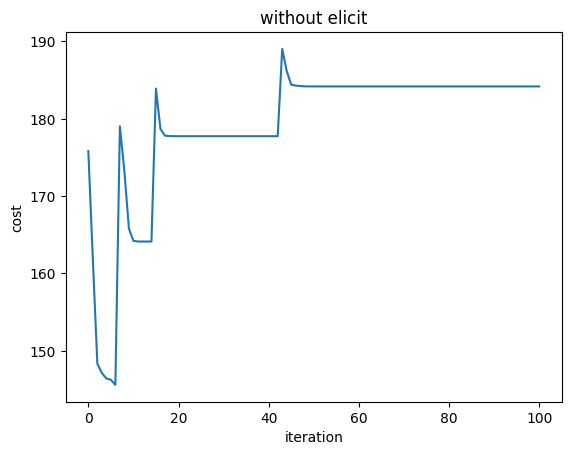

In [ ]:
#genetic algorithm without elicit
generation0=Random_Initialization(10)
sorted_gen0=np.array([x for _,x in sorted(zip(cost(generation0[:,0],generation0[:,1]),generation0),reverse=True)])
parents=sorted_gen0[:6]
best_var=[sorted_gen0[0]]
best_cost=[cost(sorted_gen0[0,0],sorted_gen0[0,1])]
for i in range(100):
  generation=Random_Initialization(3)
  for j in range(3):
    generation=np.append(generation,one_point_crossover(parents[2*j],parents[2*j+1]),axis=0)
    generation=np.append(generation,one_point_crossover(parents[2*j],parents[2*j+1]),axis=0)
  sorted_gen=np.array([x for _,x in sorted(zip(cost(generation[:,0],generation[:,1]),generation),key=lambda pair: pair[0],reverse=True)])
  best_var.append(sorted_gen[0])
  best_cost.append(cost(sorted_gen[0,0],sorted_gen[0,1]))
  parents=sorted_gen[:6]
plt.plot(range(101),best_cost)
plt.xlabel("iteration")
plt.ylabel("cost")
plt.title("without elicit")

Text(0.5, 1.0, 'by elicit')

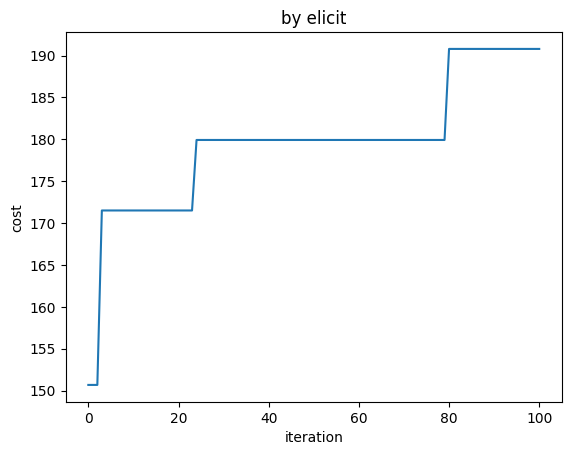

In [ ]:
#genetic algorithm by elicit
generation0=Random_Initialization(10)
sorted_gen0=np.array([x for _,x in sorted(zip(cost(generation0[:,0],generation0[:,1]),generation0),reverse=True)])
parents=sorted_gen0[:6]
best_var=[sorted_gen0[0]]
best_cost=[cost(sorted_gen0[0,0],sorted_gen0[0,1])]
for i in range(79):
  generation=Random_Initialization(3)
  generation=np.append(generation,best_var[-1].reshape(1,2),axis=0)
  for j in range(3):
    generation=np.append(generation,one_point_crossover(parents[2*j],parents[2*j+1]),axis=0)
    generation=np.append(generation,one_point_crossover(parents[2*j],parents[2*j+1]),axis=0)
  sorted_gen=np.array([x for _,x in sorted(zip(cost(generation[:,0],generation[:,1]),generation),key=lambda pair: pair[0],reverse=True)])
  best_var.append(sorted_gen[0])
  best_cost.append(cost(sorted_gen[0,0],sorted_gen[0,1]))
  parents=sorted_gen[:6]
generation=Random_Initialization(2)
generation=np.append(generation,best_var[-1].reshape(1,2),axis=0)
generation=np.append(generation,np.array([1.97652659, 5.98464028]).reshape(1,2),axis=0)
for j in range(3):
  generation=np.append(generation,one_point_crossover(parents[2*j],parents[2*j+1]),axis=0)
  generation=np.append(generation,one_point_crossover(parents[2*j],parents[2*j+1]),axis=0)
sorted_gen=np.array([x for _,x in sorted(zip(cost(generation[:,0],generation[:,1]),generation),key=lambda pair: pair[0],reverse=True)])
best_var.append(sorted_gen[0])
best_cost.append(cost(sorted_gen[0,0],sorted_gen[0,1]))
parents=sorted_gen[:6]

for i in range(20):
  generation=Random_Initialization(3)
  generation=np.append(generation,best_var[-1].reshape(1,2),axis=0)
  for j in range(3):
    generation=np.append(generation,one_point_crossover(parents[2*j],parents[2*j+1]),axis=0)
    generation=np.append(generation,one_point_crossover(parents[2*j],parents[2*j+1]),axis=0)
  sorted_gen=np.array([x for _,x in sorted(zip(cost(generation[:,0],generation[:,1]),generation),key=lambda pair: pair[0],reverse=True)])
  best_var.append(sorted_gen[0])
  best_cost.append(cost(sorted_gen[0,0],sorted_gen[0,1]))
  parents=sorted_gen[:6]
generation=Random_Initialization(2)
generation=np.append(generation,best_var[-1].reshape(1,2),axis=0)
generation=np.append(generation,np.array([1.97652659, 5.98464028]).reshape(1,2),axis=0)
plt.plot(range(101),best_cost)
plt.xlabel("iteration")
plt.ylabel("cost")
plt.title("by elicit")

In [ ]:
best_var[-1]

array([1.97652659, 5.98464028])